# Hellooo

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [30]:
df = pd.read_csv('data/Train_Data.csv')

In [31]:
df.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [32]:
import numpy as np

# Applying the condition safely
df['grp'] = df['age_group'].apply(
    lambda x: 0 if isinstance(x, str) and 'Adult' in x else (1 if isinstance(x, str) else np.nan)
)

df.drop(columns=['SEQN'], inplace=True)

df.dropna(subset=['age_group', 'grp'], inplace=True)

In [33]:
df.describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,grp
count,1934.000000,1939.000000,1934.000000,1939.000000,1934.000000,1941.000000,1943.000000,1952.000000
mean,1.509307,1.825683,27.981127,99.466220,2.015512,115.070067,11.875265,0.160861
std,0.500043,0.399355,7.343856,16.738574,0.186916,46.133851,9.779149,0.367497
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000,0.000000
25%,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.795000,0.000000
50%,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000,0.000000
75%,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000,0.000000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RIAGENDR   1934 non-null   float64
 1   PAQ605     1939 non-null   float64
 2   BMXBMI     1934 non-null   float64
 3   LBXGLU     1939 non-null   float64
 4   DIQ010     1934 non-null   float64
 5   LBXGLT     1941 non-null   float64
 6   LBXIN      1943 non-null   float64
 7   age_group  1952 non-null   object 
 8   grp        1952 non-null   float64
dtypes: float64(8), object(1)
memory usage: 152.5+ KB


RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group     0
grp           0
dtype: int64


<Axes: >

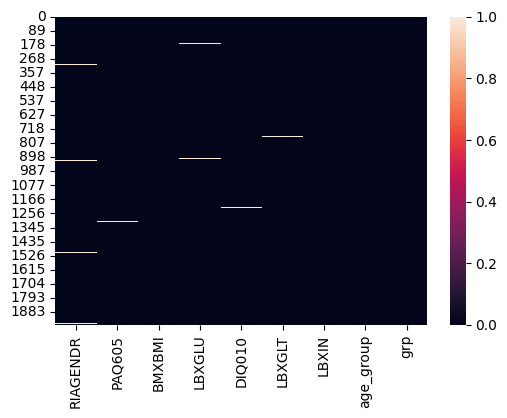

In [35]:
print(df.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull())

In [36]:
print(df[df.duplicated()]) 

Empty DataFrame
Columns: [RIAGENDR, PAQ605, BMXBMI, LBXGLU, DIQ010, LBXGLT, LBXIN, age_group, grp]
Index: []


In [37]:
df[df['age_group']=='Senior'].shape

(314, 9)

In [38]:
for cols in df.columns:
    if cols in ['SEQN', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
        continue
    print(f"Column {cols} : {df[cols].unique()}")

Column RIAGENDR : [ 2.  1. nan]
Column PAQ605 : [ 2.  1. nan  7.]
Column DIQ010 : [ 2. nan  1.  3.]
Column age_group : ['Adult' 'Senior']
Column grp : [0. 1.]


In [39]:
df.drop(columns=['age_group'], inplace=True)

# knn imputation

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Drop only the target column temporarily
target_col = 'grp'
cols_to_impute = [col for col in df.columns if col != target_col]

X = df[cols_to_impute]

# Step 2: Save non-numeric columns (if any), or columns not to scale
non_numeric_cols = ['SEQN'] if 'SEQN' in df.columns else []
X_numeric = X.drop(columns=non_numeric_cols)

# Step 3: Median Imputation for numeric columns
X_numeric_imputed = X_numeric.fillna(X_numeric.median(numeric_only=True))

# Step 4: Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_imputed)

# Step 5: Build DataFrame back from scaled data
df_knnimputed = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Step 6: Mode Imputation for non-numeric columns (e.g., IDs or categoricals)
for col in non_numeric_cols:
    df_knnimputed[col] = df[col].fillna(df[col].mode(dropna=True)[0])

# Step 7: Add back the target column
df_knnimputed[target_col] = df[target_col].values


In [41]:
df_knnimputed.isnull().sum()

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
grp         0
dtype: int64

In [42]:
print(df_knnimputed)

      RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT     LBXIN  \
0     0.972708  0.434876  1.057583  0.632520 -0.082624  0.760613  0.312409   
1     0.972708  0.434876 -1.049438 -0.626500 -0.082624 -0.761192 -0.821256   
2    -1.028057  0.434876 -0.652661 -0.626500 -0.082624 -1.022073 -0.586528   
3    -1.028057  0.434876  0.127210  0.272800 -0.082624 -0.674232  0.439511   
4     0.972708 -2.076596  1.084946  0.212847 -0.082624 -0.739452 -0.096571   
...        ...       ...       ...       ...       ...       ...       ...   
1947  0.972708  0.434876  0.756580  0.032987 -0.082624 -0.913373 -0.546552   
1948 -1.028057  0.434876  0.277711 -0.386687 -0.082624  2.021537  0.118682   
1949 -1.028057  0.434876 -0.584252  0.212847 -0.082624  0.195371  0.978668   
1950  0.972708  0.434876 -0.078019 -0.566546 -0.082624 -0.152470 -0.704404   
1951 -1.028057  0.434876 -0.474796 -0.146873 -0.082624 -0.152470 -0.830481   

      grp  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4  

<Axes: >

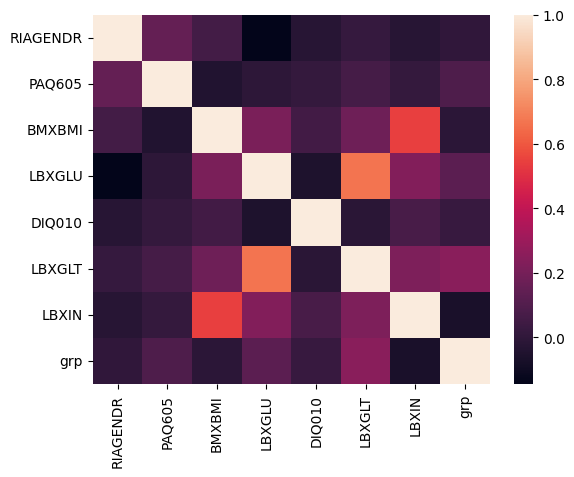

In [43]:
tempdf = df_knnimputed[[col for col in df_knnimputed.columns if col not in ['SEQN']]]
sns.heatmap(tempdf.corr())

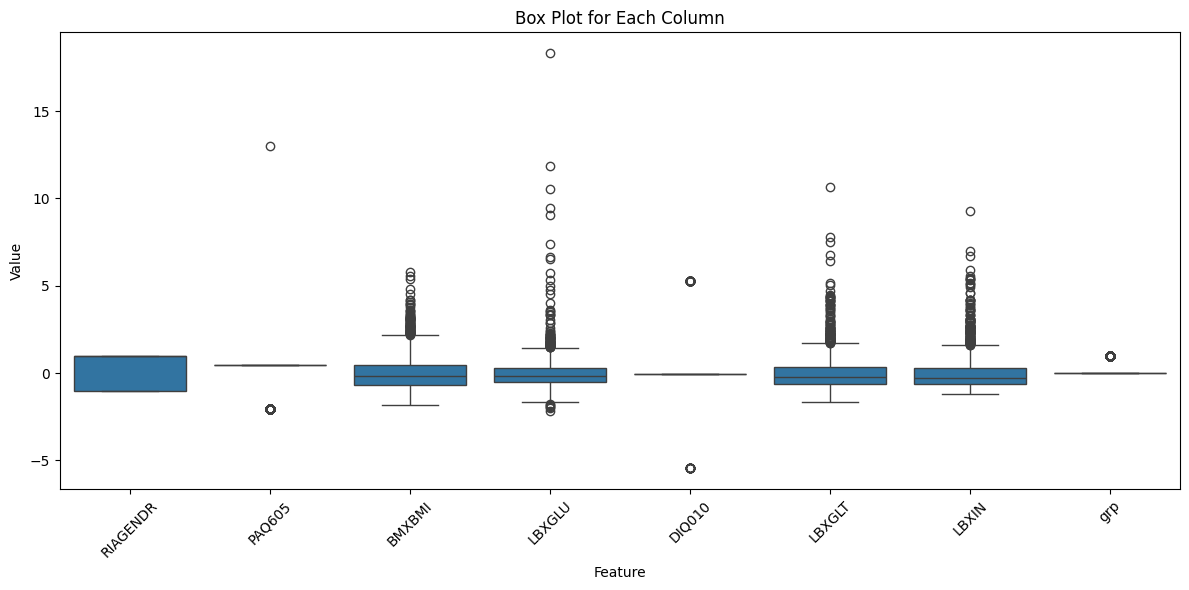

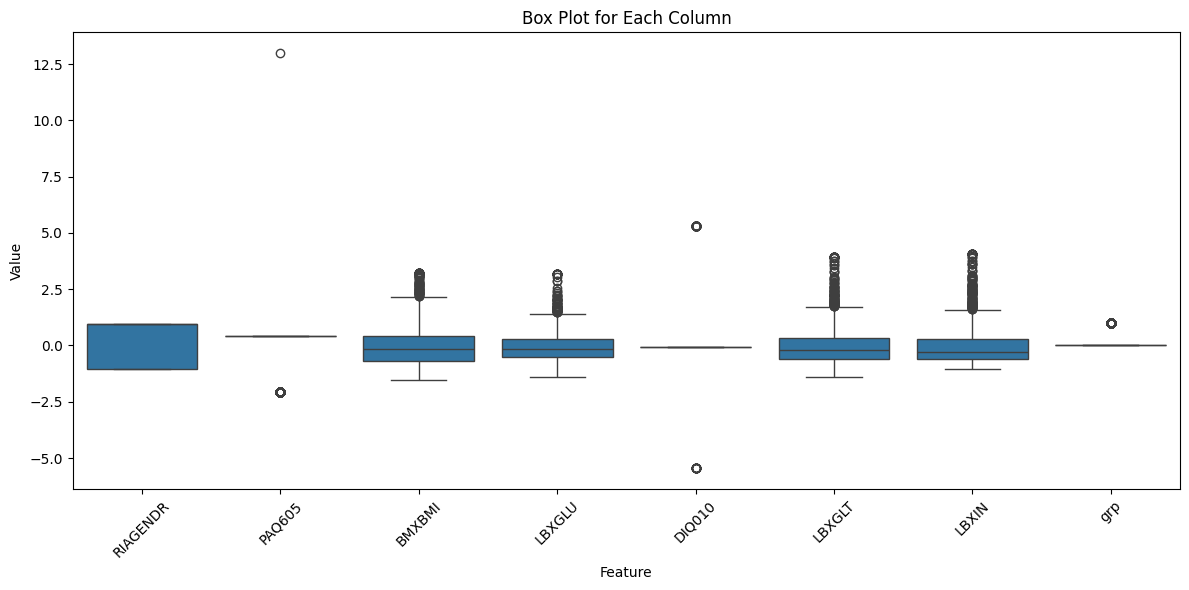

In [44]:
# Melt the dataframe to long format
df_melted = df_knnimputed.melt(var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.xticks(rotation=45)
plt.title("Box Plot for Each Column")
plt.tight_layout()
plt.show()

cols_with_outliers = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
for col in cols_with_outliers:
    df_knnimputed[col] = df_knnimputed[col].clip(lower=df_knnimputed[col].quantile(0.01), upper=df_knnimputed[col].quantile(0.99))

# Melt the dataframe to long format
df_melted = df_knnimputed.melt(var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.xticks(rotation=45)
plt.title("Box Plot for Each Column")
plt.tight_layout()
plt.show()

In [45]:
data = df_knnimputed.copy()

df = df_knnimputed.copy()

df_knnimputed

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,grp
0,0.972708,0.434876,1.057583,0.632520,-0.082624,0.760613,0.312409,0.0
1,0.972708,0.434876,-1.049438,-0.626500,-0.082624,-0.761192,-0.821256,0.0
2,-1.028057,0.434876,-0.652661,-0.626500,-0.082624,-1.022073,-0.586528,0.0
3,-1.028057,0.434876,0.127210,0.272800,-0.082624,-0.674232,0.439511,0.0
4,0.972708,-2.076596,1.084946,0.212847,-0.082624,-0.739452,-0.096571,0.0
...,...,...,...,...,...,...,...,...
1947,0.972708,0.434876,0.756580,0.032987,-0.082624,-0.913373,-0.546552,0.0
1948,-1.028057,0.434876,0.277711,-0.386687,-0.082624,2.021537,0.118682,0.0
1949,-1.028057,0.434876,-0.584252,0.212847,-0.082624,0.195371,0.978668,0.0
1950,0.972708,0.434876,-0.078019,-0.566546,-0.082624,-0.152470,-0.704404,0.0


In [46]:
import os
import json
import joblib
import numpy as np
import pandas as pd

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# =============================
# CONFIGURATION
# =============================
degrees = [1]                      # Polynomial degrees to try
n_iter = 10                          # Trials per degree
random_state = 42
output_dir = "random_search_outputs"
max_iter = 10000
# =============================

# Load your preprocessed DataFrame (already KNN-imputed)
df = df_knnimputed.drop(columns=['SEQN', 'age_group'], errors='ignore')

# Shuffle and prepare data
y = df['grp']
X = df.drop(columns=['grp'])
X, y = shuffle(X, y, random_state=random_state)

# Stratified split: train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=random_state, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=random_state, stratify=y_temp
)
# 0.1765 * 0.85 ≈ 0.15, so valid = 15% of total

# Define parameter search space
param_dist = [
    {
        'clf__solver': ['saga'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10, 100],
        'clf__class_weight': ['balanced']  # Enforce class weighting due to imbalance
    },
    {
        'clf__solver': ['lbfgs'],
        'clf__penalty': ['l2'],  # lbfgs only supports l2
        'clf__C': [0.1, 1, 10, 100],
        'clf__class_weight': ['balanced']
    }
]

# Create output directories
os.makedirs(output_dir, exist_ok=True)

for degree in degrees:
    deg_dir = os.path.join(output_dir, f"degree_{degree}")
    models_dir = os.path.join(deg_dir, "models")
    reports_dir = os.path.join(deg_dir, "reports")
    prog_file = os.path.join(deg_dir, "progress.json")

    os.makedirs(models_dir, exist_ok=True)
    os.makedirs(reports_dir, exist_ok=True)

    # Load or initialize progress tracking
    if os.path.exists(prog_file):
        with open(prog_file, 'r') as f:
            completed = set(json.load(f))
    else:
        completed = set()

    # Generate randomized parameter combinations
    sampler = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=random_state))

    print(f"\n🔎 Starting degree={degree}, {n_iter} random trials")

    try:
        for i, params in enumerate(sampler):
            if i in completed:
                continue

            print(f"-- Trial {i + 1}/{n_iter}: {params}")

            # Build pipeline with SMOTE to fix class imbalance
            pipe = ImbPipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=random_state)),   # <-- SMOTE oversampling
                ('clf', LogisticRegression(max_iter=max_iter, n_jobs=-1, tol=1e-4, warm_start=True))
            ])
            pipe.set_params(**params)

            # Train and evaluate on validation set
            pipe.fit(X_train, y_train)
            y_valid_pred = pipe.predict(X_valid)
            report = classification_report(y_valid, y_valid_pred)

            # Save model
            model_path = os.path.join(models_dir, f"model_{i}.pkl")
            joblib.dump(pipe, model_path)

            # Save classification report
            report_path = os.path.join(reports_dir, f"report_{i}.txt")
            with open(report_path, 'w') as f:
                f.write("Parameters:\n")
                f.write(json.dumps(params, indent=2))
                f.write("\n\nClassification Report (Validation):\n")
                f.write(report)

            # Update progress
            completed.add(i)
            with open(prog_file, 'w') as f:
                json.dump(sorted(completed), f)

    except KeyboardInterrupt:
        print("⚠️ Interrupted by user. Progress saved.")

    print(f"✅ Completed: {len(completed)}/{n_iter} trials for degree={degree}")



🔎 Starting degree=1, 10 random trials
-- Trial 1/10: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 10}
-- Trial 2/10: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 1}
-- Trial 3/10: {'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__class_weight': 'balanced', 'clf__C': 0.1}
-- Trial 4/10: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 0.1}
-- Trial 5/10: {'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 10}
-- Trial 6/10: {'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__class_weight': 'balanced', 'clf__C': 1}
-- Trial 7/10: {'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 0.1}
-- Trial 8/10: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 100}
-- Trial 9/10: {'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__class_weight': 'balanced

In [47]:
from sklearn.metrics import accuracy_score

# Select best model from all saved models (per degree)
for degree in degrees:
    deg_dir = os.path.join(output_dir, f"degree_{degree}")
    models_dir = os.path.join(deg_dir, "models")

    print(f"\n🔍 Evaluating models for degree {degree}...")

    best_model = None
    best_score = -np.inf
    best_model_path = None

    for filename in os.listdir(models_dir):
        if filename.endswith(".pkl"):
            model_path = os.path.join(models_dir, filename)
            model = joblib.load(model_path)

            # Predict on validation set
            y_pred = model.predict(X_valid)
            score = accuracy_score(y_valid, y_pred)  # or use f1_score, etc.

            if score > best_score:
                best_score = score
                best_model = model
                best_model_path = model_path

    print(f"✅ Best model for degree {degree}:")
    print(f"Path: {best_model_path}")
    print(f"Validation Accuracy: {best_score:.4f}")

    # Optionally save best model separately
    joblib.dump(best_model, os.path.join(deg_dir, "best_model.pkl"))



🔍 Evaluating models for degree 1...
✅ Best model for degree 1:
Path: random_search_outputs\degree_1\models\model_2.pkl
Validation Accuracy: 0.7440


In [48]:
test_data = pd.read_csv('data/Test_Data.csv')
test_data.drop(columns=['SEQN'], inplace=True)
test_cols = test_data.columns
test_data = pd.DataFrame(scaler.transform(test_data), columns=test_cols)
test_data

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,-1.028057,-2.076596,0.578714,-0.206827,-0.082624,0.434512,0.332909
1,0.972708,0.434876,-0.228521,0.032987,-0.082624,0.564952,0.348284
2,-1.028057,0.434876,0.086164,0.452660,-0.082624,0.456252,-0.311824
3,0.972708,-2.076596,-0.803163,-0.386687,-0.082624,-0.087250,0.027455
4,-1.028057,-2.076596,-0.447432,-0.506593,-0.082624,-0.217690,-0.896081
...,...,...,...,...,...,...,...
307,0.972708,0.434876,-0.830527,-1.046173,-0.082624,-0.717712,-0.955532
308,0.972708,-2.076596,0.729216,-0.266780,-0.082624,-0.826412,-0.563977
309,0.972708,0.434876,1.851136,-0.506593,-0.082624,0.738873,0.374935
310,0.972708,0.434876,-0.748435,-1.046173,-0.082624,-0.478571,-1.073409


In [49]:
test_data.isnull().sum()

RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [50]:
from sklearn.impute import KNNImputer
import pandas as pd

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=10)

# Exclude 'SEQN' and 'age_group' columns for imputation, but keep them in the final result
cols_to_impute = [col for col in test_data.columns if col not in ['SEQN', 'age_group']]

# Perform the imputation on the selected columns
df_imputed_values = imputer.fit_transform(test_data[cols_to_impute])

# Create a new DataFrame with imputed values for the selected columns
test_data = pd.DataFrame(df_imputed_values, columns=cols_to_impute)  
# Show the final imputed DataFrame
test_data.isnull().sum()


RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64

In [51]:
prediction = best_model.predict(test_data)
prediction = prediction.astype(int)
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [52]:
prediction = pd.DataFrame({
    'age_group': prediction
})
prediction.to_csv('submission.csv', index=False)

In [53]:
df = data.copy()

In [54]:
df.isnull().sum()

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
grp         0
dtype: int64

In [55]:
dfrf = data.copy()
# dfrf.drop(columns=['SEQN'], inplace=True)
dfrf.isnull().sum()

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
grp         0
dtype: int64

In [56]:
import os
import json
import joblib
import numpy as np
import pandas as pd

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# =============================
# CONFIGURATION
# =============================
n_iter = 10                          # Number of random trials
random_state = 42
output_dir = "random_search_rf_outputs"
# =============================

# Load your preprocessed DataFrame (already KNN-imputed)
# df = df.drop(columns=['SEQN'], errors='ignore')  # Drop SEQN
# df['grp'] = df['age_group']  # Assuming 'grp' is target
# df = df.drop(columns=['age_group'])

# Shuffle and prepare data
y = dfrf['grp']
X = dfrf.drop(columns=['grp'])
X, y = shuffle(X, y, random_state=random_state)

print(X.columns)

# Stratified split: train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=random_state, stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=random_state, stratify=y_temp
)

# Define Random Forest hyperparameter search space
param_dist = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 10, 20, 50, None],
    'clf__min_samples_split': [2, 5, 10, 15, 25],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__class_weight': ['balanced', 'balanced_subsample']
}

# Create output directories
os.makedirs(output_dir, exist_ok=True)
models_dir = os.path.join(output_dir, "models")
reports_dir = os.path.join(output_dir, "reports")
prog_file = os.path.join(output_dir, "progress.json")
os.makedirs(models_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)

# Load or initialize progress tracking
if os.path.exists(prog_file):
    with open(prog_file, 'r') as f:
        completed = set(json.load(f))
else:
    completed = set()

# Generate randomized parameter combinations
sampler = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=random_state))

print(f"\n🔎 Starting Random Forest with {n_iter} random trials")

try:
    for i, params in enumerate(sampler):
        if i in completed:
            continue

        print(f"-- Trial {i + 1}/{n_iter}: {params}")

        # Build pipeline with SMOTE to fix class imbalance
        pipe = ImbPipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=random_state)),
            ('clf', RandomForestClassifier(random_state=random_state, n_jobs=-1))
        ])
        pipe.set_params(**params)

        # Train and evaluate
        pipe.fit(X_train, y_train)
        y_valid_pred = pipe.predict(X_valid)
        report = classification_report(y_valid, y_valid_pred)

        # Save model
        model_path = os.path.join(models_dir, f"model_{i}.pkl")
        joblib.dump(pipe, model_path)

        # Save report
        report_path = os.path.join(reports_dir, f"report_{i}.txt")
        with open(report_path, 'w') as f:
            f.write("Parameters:\n")
            f.write(json.dumps(params, indent=2))
            f.write("\n\nClassification Report (Validation):\n")
            f.write(report)

        # Update progress
        completed.add(i)
        with open(prog_file, 'w') as f:
            json.dump(sorted(completed), f)

except KeyboardInterrupt:
    print("⚠️ Interrupted by user. Progress saved.")

print(f"✅ Completed: {len(completed)}/{n_iter} trials.")


Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'], dtype='object')

🔎 Starting Random Forest with 10 random trials
-- Trial 1/10: {'clf__n_estimators': 300, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__class_weight': 'balanced_subsample'}
-- Trial 2/10: {'clf__n_estimators': 100, 'clf__min_samples_split': 15, 'clf__min_samples_leaf': 4, 'clf__max_depth': None, 'clf__class_weight': 'balanced_subsample'}
-- Trial 3/10: {'clf__n_estimators': 100, 'clf__min_samples_split': 25, 'clf__min_samples_leaf': 2, 'clf__max_depth': 20, 'clf__class_weight': 'balanced'}
-- Trial 4/10: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 5, 'clf__class_weight': 'balanced'}
-- Trial 5/10: {'clf__n_estimators': 200, 'clf__min_samples_split': 15, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__class_weight': 'balanced_subsample'}
-- Trial 6/10: {'clf__n_estimators': 200, 'clf__m

In [57]:
import os
import joblib
import re

def extract_f1_from_report(report_text):
    """
    Extracts weighted avg F1-score from a classification report string.
    """
    match = re.search(r'weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)', report_text)
    return float(match.group(1)) if match else 0.0

best_score = -1
best_model_path = None

# Loop through all saved reports to find the best F1-score
for report_file in os.listdir(reports_dir):
    report_path = os.path.join(reports_dir, report_file)
    with open(report_path, 'r') as f:
        report_text = f.read()
        f1 = extract_f1_from_report(report_text)
        model_index = int(report_file.split('_')[1].split('.')[0])
        
        if f1 > best_score:
            best_score = f1
            best_model_path = os.path.join(models_dir, f"model_{model_index}.pkl")

# Load the best model into a variable
if best_model_path:
    best_model = joblib.load(best_model_path)
    print(f"✅ Loaded best model (F1-score: {best_score:.4f}) into variable `best_model`.")
else:
    best_model = None
    print("❌ No valid model found.")


✅ Loaded best model (F1-score: 0.7800) into variable `best_model`.


In [58]:
predictions = best_model.predict(test_data)
predictions = predictions.astype(int)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [59]:
predictions = pd.DataFrame({
    'age_group': predictions
})
prediction.to_csv('submissionrf.csv', index=False)

# KNN

In [60]:
df = data.copy()
# df.drop(columns=['SEQN'], inplace=True)
df.isnull().sum()

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
grp         0
dtype: int64

In [61]:
import os
import json
import joblib
import numpy as np
import pandas as pd

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# =============================
# CONFIGURATION
# =============================
n_iter = 10
random_state = 42
output_dir = "random_search_knn_outputs"
# =============================

# Load your preprocessed DataFrame
df = df_knnimputed.drop(columns=['SEQN', 'age_group'], errors='ignore')

# Shuffle and prepare data
y = df['grp']
X = df.drop(columns=['grp'])
X, y = shuffle(X, y, random_state=random_state)

# Stratified split: train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=random_state, stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=random_state, stratify=y_temp
)

# Define parameter search space for KNN
param_dist = {
    'clf__n_neighbors': [3, 5, 7, 9, 11, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create output directories
os.makedirs(output_dir, exist_ok=True)
models_dir = os.path.join(output_dir, "models")
reports_dir = os.path.join(output_dir, "reports")
prog_file = os.path.join(output_dir, "progress.json")
os.makedirs(models_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)

# Load or initialize progress tracking
if os.path.exists(prog_file):
    with open(prog_file, 'r') as f:
        completed = set(json.load(f))
else:
    completed = set()

# Generate randomized parameter combinations
sampler = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=random_state))

print(f"\n🔎 Starting KNN random search with {n_iter} trials")

try:
    for i, params in enumerate(sampler):
        if i in completed:
            continue

        print(f"-- Trial {i + 1}/{n_iter}: {params}")

        # Build pipeline
        pipe = ImbPipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=random_state)),
            ('clf', KNeighborsClassifier(n_jobs=-1))
        ])
        pipe.set_params(**params)

        # Train and evaluate
        pipe.fit(X_train, y_train)
        y_valid_pred = pipe.predict(X_valid)
        report = classification_report(y_valid, y_valid_pred)

        # Save model
        model_path = os.path.join(models_dir, f"model_{i}.pkl")
        joblib.dump(pipe, model_path)

        # Save report
        report_path = os.path.join(reports_dir, f"report_{i}.txt")
        with open(report_path, 'w') as f:
            f.write("Parameters:\n")
            f.write(json.dumps(params, indent=2))
            f.write("\n\nClassification Report (Validation):\n")
            f.write(report)

        # Update progress
        completed.add(i)
        with open(prog_file, 'w') as f:
            json.dump(sorted(completed), f)

except KeyboardInterrupt:
    print("⚠️ Interrupted by user. Progress saved.")

print(f"✅ Completed: {len(completed)}/{n_iter} trials.")



🔎 Starting KNN random search with 10 trials
-- Trial 1/10: {'clf__weights': 'distance', 'clf__n_neighbors': 15, 'clf__metric': 'minkowski'}
-- Trial 2/10: {'clf__weights': 'distance', 'clf__n_neighbors': 3, 'clf__metric': 'manhattan'}
-- Trial 3/10: {'clf__weights': 'uniform', 'clf__n_neighbors': 5, 'clf__metric': 'minkowski'}
-- Trial 4/10: {'clf__weights': 'uniform', 'clf__n_neighbors': 9, 'clf__metric': 'minkowski'}
-- Trial 5/10: {'clf__weights': 'uniform', 'clf__n_neighbors': 7, 'clf__metric': 'manhattan'}
-- Trial 6/10: {'clf__weights': 'distance', 'clf__n_neighbors': 9, 'clf__metric': 'minkowski'}
-- Trial 7/10: {'clf__weights': 'distance', 'clf__n_neighbors': 11, 'clf__metric': 'manhattan'}
-- Trial 8/10: {'clf__weights': 'uniform', 'clf__n_neighbors': 3, 'clf__metric': 'manhattan'}
-- Trial 9/10: {'clf__weights': 'uniform', 'clf__n_neighbors': 11, 'clf__metric': 'euclidean'}
-- Trial 10/10: {'clf__weights': 'distance', 'clf__n_neighbors': 7, 'clf__metric': 'manhattan'}
✅ Comp

In [62]:
import os
import joblib
import re

def extract_f1_from_report(report_text):
    """
    Extracts weighted avg F1-score from a classification report string.
    """
    match = re.search(r'weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)', report_text)
    return float(match.group(1)) if match else 0.0

best_score = -1
best_model_path = None

# Loop through all saved reports to find the best F1-score
for report_file in os.listdir(reports_dir):
    report_path = os.path.join(reports_dir, report_file)
    with open(report_path, 'r') as f:
        report_text = f.read()
        f1 = extract_f1_from_report(report_text)
        model_index = int(report_file.split('_')[1].split('.')[0])
        
        if f1 > best_score:
            best_score = f1
            best_model_path = os.path.join(models_dir, f"model_{model_index}.pkl")

# Load the best model into a variable
if best_model_path:
    best_model = joblib.load(best_model_path)
    print(f"✅ Loaded best model (F1-score: {best_score:.4f}) into variable `best_model`.")
else:
    best_model = None
    print("❌ No valid model found.")


✅ Loaded best model (F1-score: 0.7300) into variable `best_model`.


In [63]:
predictions = best_model.predict(test_data)
predictions = predictions.astype(int)
predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [64]:
predictions = pd.DataFrame({
    'age_group': predictions
})
prediction.to_csv('submissionknn.csv', index=False)

# Neural Network

In [65]:
df = data.copy()
# df.drop(columns=['SEQN'], inplace=True)
df.isnull().sum()

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
grp         0
dtype: int64

In [66]:
import os, json, re
import joblib
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === CONFIG ===
n_iter = 20
random_state = 42
output_dir = "random_search_nn_outputs"
os.makedirs(output_dir, exist_ok=True)
models_dir = os.path.join(output_dir, "models")
os.makedirs(models_dir, exist_ok=True)
reports_dir = os.path.join(output_dir, "reports")
os.makedirs(reports_dir, exist_ok=True)
prog_file = os.path.join(output_dir, "progress.json")
completed = set(json.load(open(prog_file))) if os.path.exists(prog_file) else set()

# === DATA PREP ===
# Replace df_knnimputed with your DataFrame
df = df_knnimputed.drop(columns=['SEQN', 'age_group'], errors='ignore')
X = df.drop(columns=['grp'])
y = df['grp'].astype(int)  # ensure binary labels are integers

X, y = shuffle(X, y, random_state=random_state)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15,
                                                  random_state=random_state, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp,
                                                      test_size=0.1765,
                                                      random_state=random_state,
                                                      stratify=y_temp)
y_valid = y_valid.astype(int)

# === Hyperparameter Space ===
param_dist = {
    'hidden_units': [10, 20, 32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [30, 50],
    'batch_size': [20, 32, 64]
}
sampler = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=random_state))

# === Helper: Model Builder ===
def build_model(input_dim, hidden_units, dropout_rate, optimizer):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dense(1, activation='sigmoid')  # binary output
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# === Helper: Extract weighted F1 from report ===
def extract_f1(report_text):
    match = re.search(r"weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)", report_text)
    return float(match.group(1)) if match else 0.0

# === Random Search ===
best_model = None
best_score = -1
best_trial = None

print(f"\n🔍 Starting {n_iter} random-search trials with TensorFlow...")

for i, params in enumerate(sampler):
    if i in completed:
        continue
    print(f"\n➡️ Trial {i+1}/{n_iter} - Params: {params}")

    # === Preprocessing ===
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    smote = SMOTE(random_state=random_state)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
    y_train_bal = y_train_bal.astype(int)

    # === Model Training ===
    model = build_model(
        input_dim=X_train_bal.shape[1],
        hidden_units=params['hidden_units'],
        dropout_rate=params['dropout_rate'],
        optimizer=params['optimizer']
    )

    es = EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(X_train_bal, y_train_bal,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              verbose=0,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[es])

    # === Evaluation ===
    y_pred = model.predict(X_valid_scaled)
    y_pred_labels = (y_pred >= 0.5).astype(int).flatten()

    report = classification_report(y_valid, y_pred_labels)
    f1 = extract_f1(report)
    print(report)

    # === Save ===
    model.save(os.path.join(models_dir, f"model_{i}.keras"))
    joblib.dump(scaler, os.path.join(models_dir, f"scaler_{i}.pkl"))
    with open(os.path.join(reports_dir, f"report_{i}.txt"), 'w') as f:
        f.write(json.dumps(params, indent=2))
        f.write("\n\n" + report)

    if f1 > best_score:
        best_score = f1
        best_model = model
        best_trial = i

    completed.add(i)
    json.dump(sorted(completed), open(prog_file, 'w'))

print(f"\n✅ Completed: {len(completed)}/{n_iter} trials")
print(f"🏆 Best trial: {best_trial} with weighted F1: {best_score:.4f}")



🔍 Starting 10 random-search trials with TensorFlow...

➡️ Trial 1/10 - Params: {'optimizer': 'rmsprop', 'hidden_units': 128, 'epochs': 50, 'dropout_rate': 0.2, 'batch_size': 20}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       246
           1       0.34      0.57      0.43        47

    accuracy                           0.75       293
   macro avg       0.62      0.68      0.63       293
weighted avg       0.81      0.75      0.77       293


➡️ Trial 2/10 - Params: {'optimizer': 'adam', 'hidden_units': 20, 'epochs': 30, 'dropout_rate': 0.4, 'batch_size': 20}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       246
           1       0.30      0.66      0.42        47

    accuracy                           0.70       293
   macro avg       0.61      0.69      0.61       293
weighted avg       0.82      0.70      0.74       293


➡️ Trial 3/10 - Params: {'optimizer': 'rmsprop', 'hidden_units': 20, 'epochs': 50, 'dropout_rate': 0.3, 'batch_size': 64}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       246
           1       0.32      0.62      0.42        47

    accuracy                           0.73       293
   macro avg       0.62      0.68      0.62       293
weighted avg       0.82      0.73      0.76       293


➡️ Trial 4/10 - Params: {'optimizer': 'adam', 'hidden_units': 128, 'epochs': 50, 'dropout_rate': 0.2, 'batch_size': 32}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       246
           1       0.33      0.60      0.42        47

    accuracy                           0.74       293
   macro avg       0.62      0.68      0.63       293
weighted avg       0.82      0.74      0.77       293


➡️ Trial 5/10 - Params: {'optimizer': 'rmsprop', 'hidden_units': 32, 'epochs': 30, 'dropout_rate': 0.3, 'batch_size': 64}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       246
           1       0.35      0.55      0.43        47

    accuracy                           0.76       293
   macro avg       0.63      0.68      0.64       293
weighted avg       0.81      0.76      0.78       293


➡️ Trial 6/10 - Params: {'optimizer': 'rmsprop', 'hidden_units': 32, 'epochs': 50, 'dropout_rate': 0.2, 'batch_size': 20}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       246
           1       0.34      0.64      0.44        47

    accuracy                           0.74       293
   macro avg       0.63      0.70      0.64       293
weighted avg       0.82      0.74      0.77       293


➡️ Trial 7/10 - Params: {'optimizer': 'adam', 'hidden_units': 32, 'epochs': 30, 'dropout_rate': 0.3, 'batch_size': 20}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       246
           1       0.33      0.68      0.44        47

    accuracy                           0.73       293
   macro avg       0.63      0.71      0.63       293
weighted avg       0.83      0.73      0.76       293


➡️ Trial 8/10 - Params: {'optimizer': 'adam', 'hidden_units': 128, 'epochs': 30, 'dropout_rate': 0.2, 'batch_size': 32}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       246
           1       0.36      0.57      0.44        47

    accuracy                           0.76       293
   macro avg       0.63      0.69      0.64       293
weighted avg       0.82      0.76      0.78       293


➡️ Trial 9/10 - Params: {'optimizer': 'rmsprop', 'hidden_units': 20, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 32}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       246
           1       0.31      0.66      0.42        47

    accuracy                           0.71       293
   macro avg       0.61      0.69      0.61       293
weighted avg       0.82      0.71      0.74       293


➡️ Trial 10/10 - Params: {'optimizer': 'adam', 'hidden_units': 128, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 32}


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       246
           1       0.34      0.64      0.44        47

    accuracy                           0.74       293
   macro avg       0.63      0.70      0.64       293
weighted avg       0.82      0.74      0.77       293


✅ Completed: 10/10 trials
🏆 Best trial: 4 with weighted F1: 0.7800


In [67]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_bal).value_counts())


Before SMOTE: grp
0    1146
1     220
Name: count, dtype: int64
After SMOTE: grp
1    1146
0    1146
Name: count, dtype: int64


In [68]:
predictions = best_model.predict(test_data)
predictions = (predictions > 0.5).astype(int).flatten()
predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [69]:
predictions = pd.DataFrame({
    'age_group': predictions
})
predictions.to_csv('submissionnn.csv', index=False)

predictions

,age_group
0,0
1,1
2,1
3,0
4,0
...,...
307,0
308,0
309,0
310,0
